In [2]:
import matplotlib.pyplot as plt
from src.FunctionsNetworkPlot import *

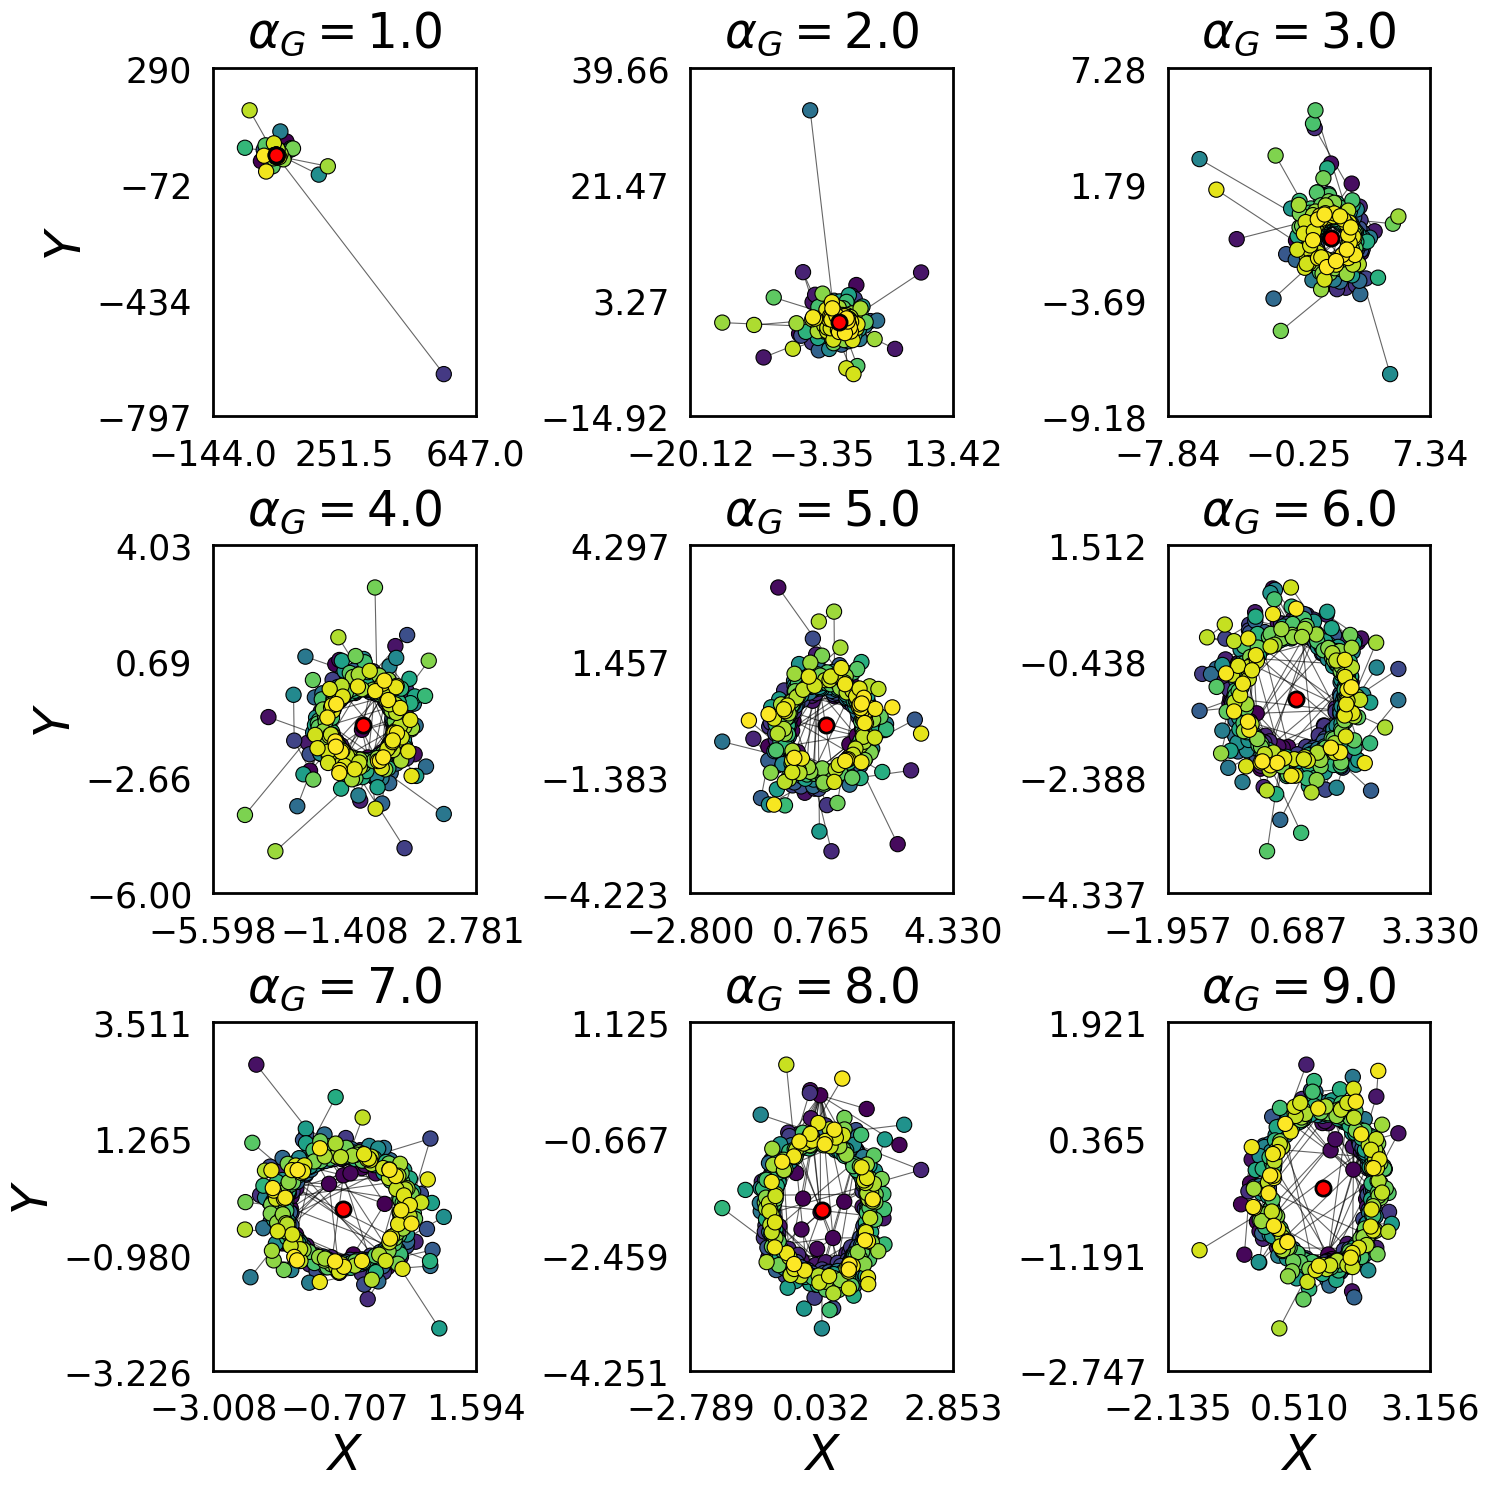

In [26]:
# Criar a figura e a grade de subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Definir grafos e posições para cada subplot
graphs = []
positions = []
titles = []

N = 500
alpha_a_f = 2.0
alpha_g_v = [1.0, 2.0, 3.0,
             4.0, 5.0, 6.0,
             7.0, 8.0, 9.0]
dim = 2

for i in range(9):
    # Criar um grafo
    G = nx.Graph()
    fn = select_first_gml_gz_file(N, dim, alpha_a_f, alpha_g_v[i])
    edges, nodes_positions = positions_GML(N, dim, alpha_a_f, alpha_g_v[i], fn)

    # Adicionar nós com as posições 2D extraídas das coordenadas 3D
    for node, pos in nodes_positions.items():
        G.add_node(node, pos=(pos[0], pos[1]))  # Apenas coordenadas x e y

    pos = nx.get_node_attributes(G, 'pos')
    G.add_edges_from(edges)

    graphs.append(G)
    positions.append(pos)
    titles.append(rf'$\alpha_G =  {alpha_g_v[i]}$')

# Preencher cada subplot com um grafo
for i, ax in enumerate(axs.flat):
    row, col = divmod(i, 3)  # Calcula a linha e a coluna do subplot
    draw_graph_subplots(ax, graphs[i], positions[i], titles[i], row, col)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.savefig("../../results/network/network_2d_alpha_g_N500.png", dpi=300)
plt.show()


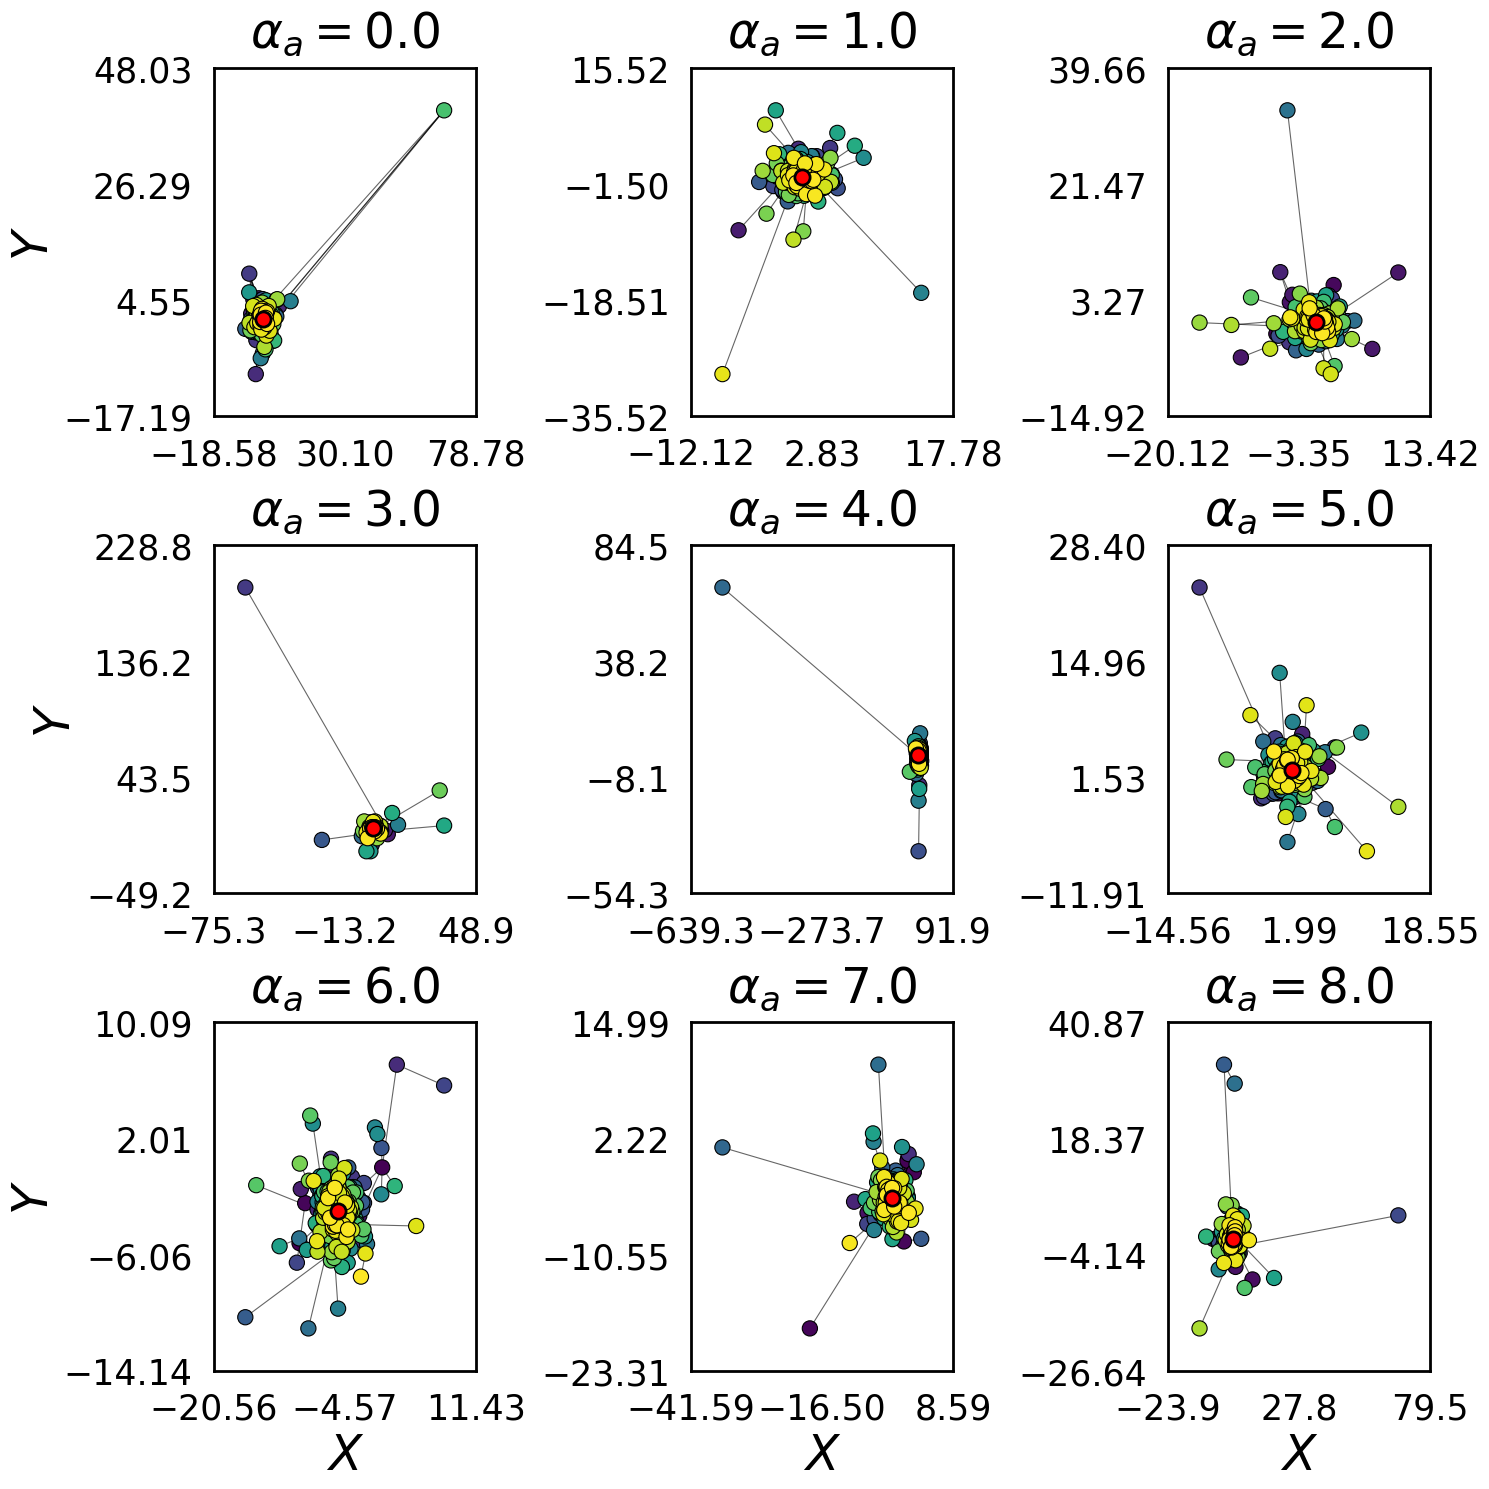

In [27]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Defina grafos e posições para cada subplot
graphs = []
positions = []
titles = []

N = 500
alpha_g_f = 2.0
alpha_a_v = [0.0, 1.0 ,2.0, 3.0,
           4.0, 5.0, 6.0, 
           7.0, 8.0]

dim = 2

for i in range(9):
    # Criar um grafo
    G = nx.Graph()
    fn = select_first_gml_gz_file(N, dim, alpha_a_v[i], alpha_g_f)
    edges, nodes_positions = positions_GML(N, dim, alpha_a_v[i], alpha_g_f, fn)

    # Adicionar nós com as posições 2D extraídas das coordenadas 3D
    for node, pos in nodes_positions.items():
        G.add_node(node, pos=(pos[0], pos[1]))  # Apenas coordenadas x e y

    pos = nx.get_node_attributes(G, 'pos')
    G.add_edges_from(edges)

    graphs.append(G)
    positions.append(pos)
    titles.append(rf'$\alpha_a =  {alpha_a_v[i]}$')

# Preencher cada subplot com um grafo
for i, ax in enumerate(axs.flat):
    row, col = divmod(i, 3)  # Calcula a linha e a coluna do subplot
    draw_graph_subplots(ax, graphs[i], positions[i], titles[i], row, col)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.savefig("../../results/network/network_2d_alpha_a.png", dpi=300)
plt.show()

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_graph(ax, G, pos, title, dim=2):
    """
    Função para desenhar um grafo em 1D, 2D ou 3D, garantindo proporção correta.
    """

    # Configurar título
    ax.set_title(title, fontsize=25)

    # Separar coordenadas dos nós
    x_values = np.array([p[0] for p in pos.values()])
    
    if dim >= 2:
        y_values = np.array([p[1] for p in pos.values()])
    
    if dim == 3:
        z_values = np.array([p[2] for p in pos.values()])

    # Ajustar os limites dos eixos
    x_min, x_max = x_values.min() - 1, x_values.max() + 1
    ax.set_xlim(x_min, x_max)

    if dim >= 2:
        y_min, y_max = y_values.min() - 1, y_values.max() + 1
        ax.set_ylim(y_min, y_max)

    if dim == 3:
        z_min, z_max = z_values.min() - 1, z_values.max() + 1
        ax.set_zlim(z_min, z_max)

    # Ajustar proporção correta para gráficos 2D e 3D
    if dim == 2:
        ax.set_aspect('equal')  # Mantém escala uniforme no 2D
    elif dim == 3:
        aspect_ratio = (z_max - z_min) / (x_max - x_min) if (x_max - x_min) != 0 else 1
        ax.set_box_aspect([1, 1, aspect_ratio])  # Ajusta proporção correta em 3D

    # Desenhar arestas
    for edge in G.edges():
        p1, p2 = pos[edge[0]], pos[edge[1]]
        if dim == 1:
            ax.plot([p1[0], p2[0]], [0, 0], color='#000000', alpha=0.8, lw=2)  # Linha horizontal
        elif dim == 2:
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='#000000', alpha=1.0)
        else:
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='#000000', alpha=1.0)

    # Destacar o nó na origem (0,0,0) ou (0,0) ou (0)
    special_node = None
    for node, coords in pos.items():
        if (dim == 1 and coords[0] == 0) or \
           (dim == 2 and coords == (0, 0)) or \
           (dim == 3 and coords == (0, 0, 0)):
            special_node = node

    # Desenhar nós normais
    if dim == 1:
        ax.scatter(x_values, np.zeros_like(x_values), s=600, c='#ff6666', edgecolors='black')
    elif dim == 2:
        nx.draw_networkx_nodes(G, pos, ax=ax, node_size=700, node_color='#ff6666', edgecolors='black', hide_ticks=False)
    else:
        ax.scatter(x_values, y_values, z_values, s=300, c='#ff6666', edgecolors='black')

    # Desenhar o nó da origem por último para sobrepor os demais
    if special_node:
        if dim == 1:
            ax.scatter([0], [0], s=900, c='#66b3ff', edgecolors='black', linewidths=2.5)
        elif dim == 2:
            nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=[special_node], node_size=900, 
                                   node_color='#66b3ff', edgecolors='black', linewidths=2.5, hide_ticks=False)
        else:
            ax.scatter([0], [0], [0], s=900, c='#66b3ff', edgecolors='black', linewidths=2.5)

    # Ajustes específicos para dim=3
    if dim == 3:
        ax.view_init(elev=20, azim=30)  # Ajusta a perspectiva para melhor visualização

        # Melhorar a visibilidade dos ticks e rótulos dos eixos
        ax.xaxis.labelpad = 15  
        ax.yaxis.labelpad = 15  
        ax.zaxis.labelpad = 15  
        
        ax.tick_params(axis='x', pad=5)  
        ax.tick_params(axis='y', pad=5)  
        ax.tick_params(axis='z', pad=5)  

        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        ax.grid(True)  

    # Exibir rótulos dos eixos conforme a dimensão
    ax.set_xlabel(r'$X$', fontsize=25)
    if dim != 3:
        ax.set_ylabel(r'$Y$', fontsize=25)
    else:
        ax.set_ylabel(r'$Y$', fontsize=25)
        ax.set_zlabel(r'$Z$', fontsize=25)

    # Garantir que os valores numéricos dos eixos apareçam
    ax.tick_params(axis='both', which='both', width=1.4, length=16.0, direction='in', labelsize=25)
    
    # Melhorar o ajuste final para evitar cortes
    plt.tight_layout()


In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def calculate_center_of_mass(pos, dim=2):
    """Calcula o centro de massa do grafo para 1D, 2D ou 3D."""
    x_cm = sum(x for x, *_ in pos.values()) / len(pos)
    
    if dim == 1:
        return (x_cm,)  # Retorna apenas o X para 1D
    
    y_cm = sum(y for _, y, *_ in pos.values()) / len(pos)
    
    if dim == 2:
        return (x_cm, y_cm)  # Retorna X e Y para 2D
    
    z_cm = sum(z for _, _, z in pos.values()) / len(pos)
    return (x_cm, y_cm, z_cm)  # Retorna X, Y e Z para 3D

def draw_graph(ax, G, pos, title, dim=2):
    """Desenha um grafo em 1D, 2D ou 3D, garantindo proporção correta."""

    # Configurar título
    ax.set_title(title, fontsize=25)

    # Separar coordenadas dos nós
    x_values = np.array([p[0] for p in pos.values()])
    y_values = np.array([p[1] for p in pos.values()]) if dim >= 2 else None
    z_values = np.array([p[2] for p in pos.values()]) if dim == 3 else None

    # **Criar degradê de cores ANTES de adicionar o centro de massa**
    cmap = plt.get_cmap('viridis', len(pos))
    norm = mcolors.Normalize(vmin=0, vmax=len(pos) - 1)
    node_colors = [cmap(norm(i)) for i in range(len(pos))]

    # **Calcular e adicionar o centro de massa**
    cm_pos = calculate_center_of_mass(pos, dim)
    G.add_node("cm", pos=cm_pos)
    pos["cm"] = cm_pos  # Adicionar o CM no dicionário de posições

    # Ajustar os limites dos eixos
    ax.set_xlim(x_values.min() - 1, x_values.max() + 1)
    if dim >= 2:
        ax.set_ylim(y_values.min() - 1, y_values.max() + 1)
    if dim == 3:
        ax.set_zlim(z_values.min() - 1, z_values.max() + 1)

    # Ajustar proporção correta para gráficos 2D e 3D
    if dim == 2:
        ax.set_aspect('equal')
    elif dim == 3:
        ax.set_box_aspect([1, 1, (z_values.max() - z_values.min()) / (x_values.max() - x_values.min())])

    # Desenhar arestas
    for edge in G.edges():
        p1, p2 = pos[edge[0]], pos[edge[1]]
        if dim == 1:
            ax.plot([p1[0], p2[0]], [0, 0], color='#000000', alpha=0.8, lw=2)
        elif dim == 2:
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='#000000', alpha=1.0)
        else:
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='#000000', alpha=1.0)

    # **Desenhar nós com cores do degradê**
    if dim == 1:
        ax.scatter(x_values, np.zeros_like(x_values), s=600, c=node_colors[:len(x_values)], edgecolors='black')
    elif dim == 2:
        nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=list(pos.keys())[:-1], node_size=700,
                               node_color=node_colors[:len(x_values)], edgecolors='black')
    else:
        ax.scatter(x_values, y_values, z_values, s=300, c=node_colors[:len(x_values)], edgecolors='black')

    # **Destacar o centro de massa**
    if dim == 1:
        ax.scatter([cm_pos[0]], [0], s=900, c='red', edgecolors='black', linewidths=2.5)
    elif dim == 2:
        nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=["cm"], node_size=900, 
                               node_color='red', edgecolors='black', linewidths=2.5)
    else:
        ax.scatter([cm_pos[0]], [cm_pos[1]], [cm_pos[2]], s=900, c='red', edgecolors='black', linewidths=2.5)

    # Ajustes específicos para dim=3
    if dim == 3:
        ax.view_init(elev=20, azim=30)
        ax.tick_params(axis='x', pad=5)
        ax.tick_params(axis='y', pad=5)
        ax.tick_params(axis='z', pad=5)
        ax.grid(True)

    # Exibir rótulos dos eixos
    ax.set_xlabel(r'$X$', fontsize=25)
    if dim != 3:
        ax.set_ylabel(r'$Y$', fontsize=25)
    else:
        ax.set_ylabel(r'$Y$', fontsize=25)
        ax.set_zlabel(r'$Z$', fontsize=25)

    # Garantir que os valores numéricos dos eixos apareçam
    ax.tick_params(axis='both', which='both', width=1.4, length=16.0, direction='in', labelsize=25)
    
    # Melhorar o ajuste final para evitar cortes
    plt.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: '../../network/N_500/dim_1/alpha_a_2.00_alpha_g_2.00/gml/'

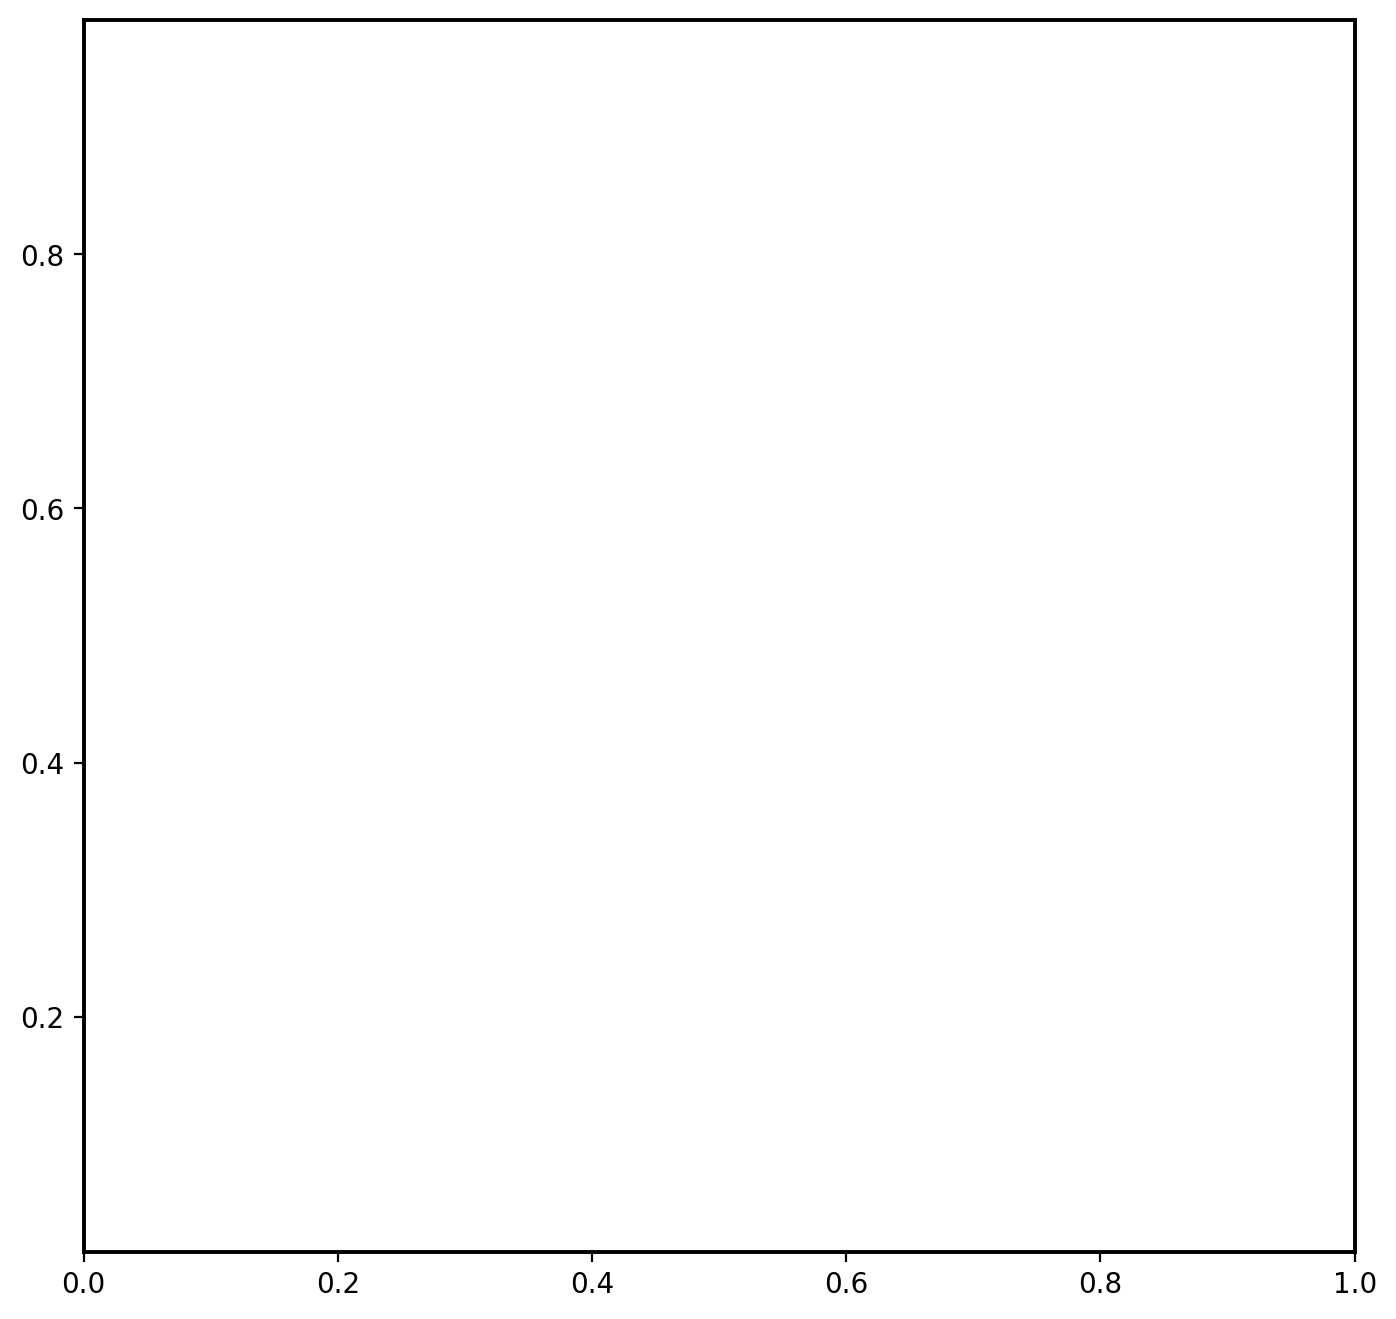

In [8]:
N = 500
alpha_a = 2.00
alpha_g = 2.00
dimensions = [1,2,3]

# Definições de tamanho e DPI
width_px = 800  # Largura desejada em pixels
height_px = 750  # Altura desejada em pixels
dpi_value = 200  # Alta resolução para publicação científica

# Converter pixels para polegadas (usando DPI)
fig_width_in = width_px / dpi_value
fig_height_in = height_px / dpi_value

for dim in dimensions:
    if dim == 3:
        fig = plt.figure(figsize=(15.0, 7.8), dpi=dpi_value)
        ax = fig.add_subplot(111, projection='3d')  # Criar um eixo 3D
        ax.set_box_aspect([1, 1, 1])  # Mantém a proporção correta em 3D
    else:
        fig, ax = plt.subplots(figsize=(8.2, 8.0), dpi=dpi_value)  # Criar um eixo 2D
        ax.set_aspect('equal', adjustable='datalim')  # Mantém a escala uniforme

    G = nx.Graph()
    fn = select_first_gml_gz_file(N, dim, alpha_a, alpha_g)
    edges, nodes_positions = positions_GML(N, dim, alpha_a, alpha_g, fn)
    for node, pos in nodes_positions.items():
        if(dim != 3):
            G.add_node(node, pos=(pos[0], pos[1]))  # Apenas coordenadas x e y
        else:
            G.add_node(node, pos=(pos[0], pos[1], pos[2]))  # Apenas coordenadas x e y

    pos = nx.get_node_attributes(G, 'pos')

    G.add_edges_from(edges)
    draw_graph(ax, G, pos, rf"Dim $= {dim}$", dim=dim)
    #plt.savefig(f"../../results/alpha_a_2.00_alpha_g_2.00_dim_{dim}.svg", bbox_inches='tight', pad_inches=0, transparent=True)